<a href="https://colab.research.google.com/github/ananya07105/OR_LAB/blob/main/Exp10_Ananya_R103219029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transportation Problem**

1)	Three refineries with daily capacities of 6, 5, and 8 million gallons, respectively, supply
three distribution areas with daily demands of 4, 8, and 7 million gallons, respectively.
Gasoline is transported to the three distribution areas through a network of pipelines.
The transportation cost is 10 cents per 1000 gallons per pipeline mile. Given Table  gives the
mileage between the refineries and the distribution areas. Determine the optimum shipping schedule in the network.


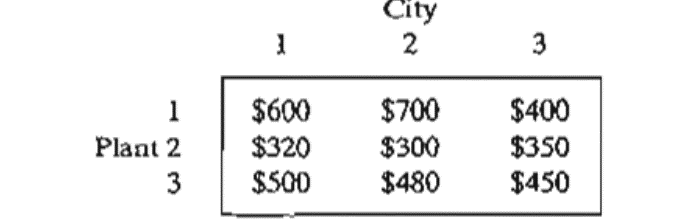

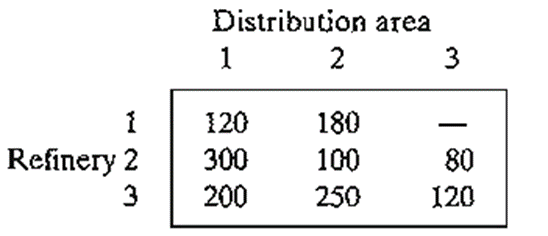

In [1]:
from collections import defaultdict
costs  = {'W': {'A': 120, 'B': 180, 'C': 1000},
          'X': {'A': 300, 'B': 100, 'C': 80},
          'Y': {'A': 200, 'B': 250, 'C': 120}}
demand = {'A': 4, 'B': 8, 'C': 7}
cols = sorted(demand)
supply = {'W': 6, 'X': 5, 'Y': 8}
res = dict((k, defaultdict(int)) for k in costs)
g = {}
for x in supply:
    g[x] = sorted(costs[x], key=lambda g: costs[x][g])
for x in demand:
    g[x] = sorted(costs, key=lambda g: costs[g][x])

while g:
    d = {}
    for x in demand:
        d[x] = (costs[g[x][1]][x] - costs[g[x][0]][x]) if len(g[x]) > 1 else costs[g[x][0]][x]
    s = {}
    for x in supply:
        s[x] = (costs[x][g[x][1]] - costs[x][g[x][0]]) if len(g[x]) > 1 else costs[x][g[x][0]]
    f = max(d, key=lambda n: d[n])
    t = max(s, key=lambda n: s[n])
    t, f = (f, g[f][0]) if d[f] > s[t] else (g[t][0], t)
    v = min(supply[f], demand[t])
    res[f][t] += v
    demand[t] -= v
    if demand[t] == 0:
        for k, n in supply.items():
            if n != 0:
                g[k].remove(t)
        del g[t]
        del demand[t]
    supply[f] -= v
    if supply[f] == 0:
        for k, n in demand.items():
            if n != 0:
                g[k].remove(f)
        del g[f]
        del supply[f]

cost = 0
for g in sorted(costs):
    for n in cols:
        y = res[g][n]
        cost += y * costs[g][n]
print("\n\nTotal Cost = ", cost)



Total Cost =  2430
